In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

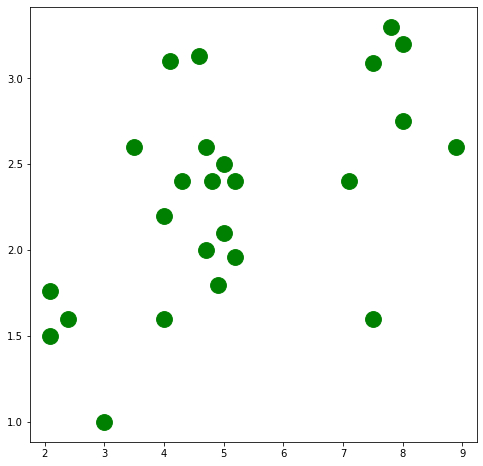

In [3]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.show()

In [4]:
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

x.size()

torch.Size([25, 1])

In [5]:
inp = 1
hidden = 5
out = 1

In [8]:
# .Seguential -> container for the layers of the NN; layers applied in sequence to the input given
model = torch.nn.Sequential(torch.nn.Linear(inp, hidden), 
                            # ReLu activation function
                            torch.nn.ReLU(), 
                            torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

In [9]:
learning_rate = 1e-4

for i in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate*param.grad

0 20.920257568359375
1 19.81983184814453
2 19.287620544433594
3 19.017799377441406
4 18.870582580566406
5 18.78114128112793
6 18.71910285949707
7 18.67014503479004
8 18.62748146057129
9 18.587888717651367
10 18.549829483032227
11 18.512563705444336
12 18.475753784179688
13 18.439212799072266
14 18.402873992919922
15 18.366695404052734
16 18.330657958984375
17 18.294757843017578
18 18.258991241455078
19 18.223344802856445
20 18.18781852722168
21 18.152420043945312
22 18.117136001586914
23 18.08197784423828
24 18.046937942504883
25 18.012012481689453
26 17.977205276489258
27 17.942520141601562
28 17.907947540283203
29 17.873493194580078
30 17.83915138244629
31 17.804929733276367
32 17.770811080932617
33 17.73681640625
34 17.70292854309082
35 17.66915512084961
36 17.635488510131836
37 17.601938247680664
38 17.568498611450195
39 17.535165786743164
40 17.50193977355957
41 17.468826293945312
42 17.435819625854492
43 17.402917861938477
44 17.370128631591797
45 17.337440490722656
46 17.3048553

In [10]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.0345],
        [1.2358],
        [3.0069],
        [2.8679],
        [1.8956],
        [3.1110],
        [3.4930],
        [2.2082],
        [1.9963],
        [1.1317],
        [3.1805],
        [2.1387],
        [3.0069],
        [2.1387],
        [1.7914],
        [3.1805],
        [2.2082],
        [2.1040],
        [1.4442],
        [2.0345],
        [1.7914],
        [2.0693],
        [1.6178],
        [1.1317],
        [1.8262]], grad_fn=<AddmmBackward>)

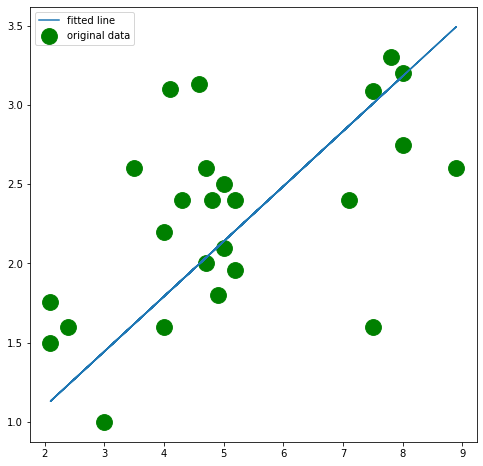

In [11]:
predicted = predicted_in_tensor.detach().numpy()

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.plot(x_train, predicted, label='fitted line')
plt.legend()
plt.show()

In [12]:
# using optimizers

model = torch.nn.Sequential(torch.nn.Linear(inp, hidden), 
                            torch.nn.ReLU(), 
                            torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(i, loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

0 555.6465454101562
1 337.9783935546875
2 220.29901123046875
3 148.5191192626953
4 102.09339141845703
5 71.28291320800781
6 50.68954086303711
7 36.971038818359375
8 27.9119873046875
9 21.995447158813477
10 18.17502212524414
11 15.734038352966309
12 14.188519477844238
13 13.216960906982422
14 12.6091890335083
15 12.229808807373047
16 11.992681503295898
17 11.843585968017578
18 11.748685836791992
19 11.687005996704102
20 11.645637512207031
21 11.61664867401123
22 11.59519100189209
23 11.578319549560547
24 11.564229965209961
25 11.55183219909668
26 11.540473937988281
27 11.529743194580078
28 11.519401550292969
29 11.509305000305176
30 11.499359130859375
31 11.489513397216797
32 11.479737281799316
33 11.470009803771973
34 11.460317611694336
35 11.450654983520508
36 11.441017150878906
37 11.431403160095215
38 11.421806335449219
39 11.4122314453125
40 11.40267276763916
41 11.393136024475098
42 11.38361644744873
43 11.374112129211426
44 11.364629745483398
45 11.355165481567383
46 11.345717430

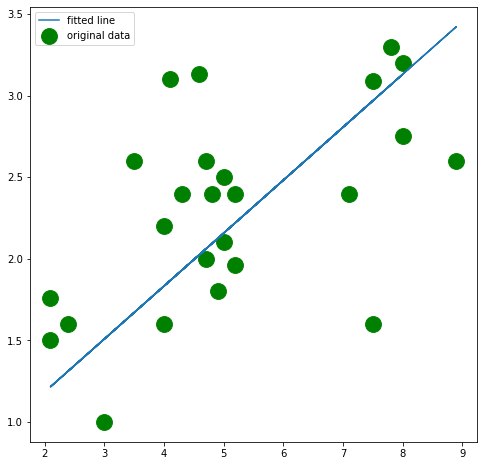

In [14]:
predicted_in_tensor = model(x)
predicted = predicted_in_tensor.detach().numpy()

plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='original data')
plt.plot(x_train, predicted, label='fitted line')
plt.legend()
plt.show()